# Machine learning theory

In [98]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [99]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [100]:
# Create DataFrame from numpy matrices
boston_data = pd.DataFrame(
    data=boston.data, #data
    columns=boston.feature_names #features
)

# add the column with target feature
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [102]:
boston_data.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

Text(0, 0.5, 'Correlation_coefficient')

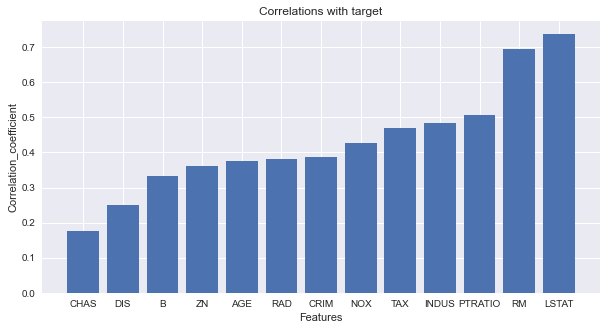

In [104]:
# Calculate module of the correlation
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()

# Delete correlation with 'MEDV'
corr_with_target = corr_with_target.drop('MEDV')

# Build the bar plot
fig, ax = plt.subplots(figsize=(10,5)) # figure + axes
ax.bar(corr_with_target.index, corr_with_target.values) # bar plot
ax.set_title('Correlations with target') 
ax.set_xlabel('Features')
ax.set_ylabel('Correlation_coefficient')

In [105]:
X = boston_data[['LSTAT']] # observation matrix
y = boston_data['MEDV'] # vector of correctr answers

display(X.head())
print('---------------')
display(y.head())

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


---------------


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Analytical solution by the method of least squares

![avatar](data/ret32.png)

In [109]:
def linear_regression(X, y):
  # Create the vector from 1
  ones = np.ones(X.shape[0])
  # Add the vector to the table 
  X = np.column_stack([ones, X])
  # Calculate the inverse matrix Q
  Q = np.linalg.inv(X.T @ X)
  # Сalculate the vector of coefficients
  w = Q @ X.T @ y
  return w

In [110]:
linear_regression(X, y)

array([34.55384088, -0.95004935])

In [111]:
# Calculate linear regression parameters
w = linear_regression(X, y)
# Output the calculated values of the parameters as vector
print(f'Vector w: {w}')
# Output the parameters
print(f'w0: {round(w[0],2)}')
print(f'w1: {round(w[1],2)}')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [112]:
# Setting the percentage of LSTAT
x_example = 5.18
# making a prediction
y_predict = w[0] + w[1] * x_example
print(f'Predicted value: {round(float(y_predict),2)}')

Predicted value: 29.63


In [113]:
# Create the plot_regression_2d() function
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
  fig, ax = plt.subplots(figsize=(8, 4)) 
  ax.scatter(X, y_true, alpha=0.7, label='Sample data')
  ax.plot(X, y_predict, color='black', label='Regression model')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend(facecolor='white', fontsize=11)

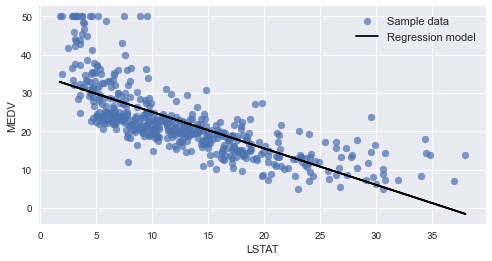

In [114]:
# Make the prediction for all objects
y_predict = w[0] + w[1] * X

# Create the plot
plot_regression_2d(X, y, y_predict)

###  Analytical solution using the SKLEARN

In [115]:
from sklearn import linear_model

In [116]:
# Create object of the class LinearRegression
lr_lstat = linear_model.LinearRegression()

# Training model. Find the parameters by OLS (Ordinary Least Squares)
lr_lstat.fit(X, y)

print(f'w0: {lr_lstat.intercept_}') # w0
print(f'w1: {lr_lstat.coef_}') # w1

w0: 34.5538408793831
w1: [-0.95004935]


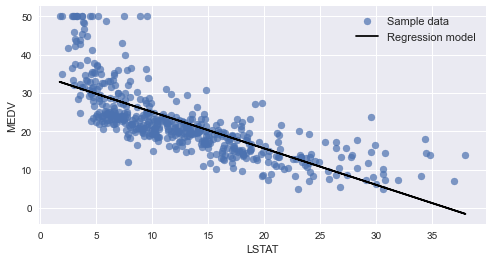

In [117]:
# Predict the median price for all plots from the dataset
y_predict = lr_lstat.predict(X)

# Build the plot
plot_regression_2d(X, y, y_predict)

### For all factors

In [118]:
# Create list of the factors
features = boston_data.drop('MEDV', axis=1).columns

# Create matrix of the X and the vector y
X = boston_data[features]
y = boston_data['MEDV']

# Create the object of the LinearRegression class
lr_full = linear_model.LinearRegression()

# Training model. Find the parameters by OLS (Ordinary Least Squares)
lr_full.fit(X, y)

LinearRegression()

In [119]:
# Create the table from the features and their coefficients
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})

# Create row of the table with w0
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Comparison of models

Text(0, 0.5, 'Model')

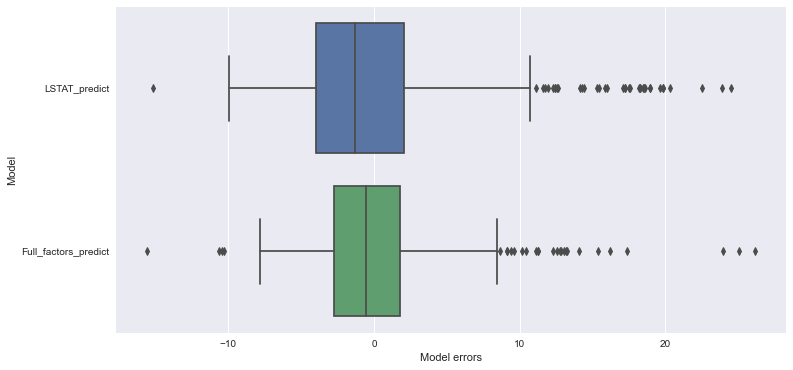

In [120]:
# Error visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Errors of the model for 'LSTAT' factor
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])

# Errors of the model for all factors
y_errors_full = y - lr_full.predict(boston_data[features])

errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat,
     'Full_factors_predict': y_errors_full   
    }
)

# Build the boxplot
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model')

### TASK 2.7

In [121]:
new_area = pd.DataFrame({
    'CRIM': [0.35114],
    'ZN': [0.00000],
    'INDUS': [7.38000],
    'CHAS': [0.00000],
    'NOX': [0.49300],
    'RM': [6.04100],
    'AGE': [49.90000],
    'DIS': [4.72110],
    'RAD': [5.00000],
    'TAX': [287.00000],
    'PTRATIO': [19.60000],
    'B': [396.90000],
    'LSTAT': [7.70000]})

In [122]:
new_area

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


In [123]:
coef_df['Coefficients']

0     -0.108011
1      0.046420
2      0.020559
3      2.686734
4    -17.766611
5      3.809865
6      0.000692
7     -1.475567
8      0.306049
9     -0.012335
10    -0.952747
11     0.009312
12    -0.524758
13    36.459488
Name: Coefficients, dtype: float64

In [124]:
w0 = coef_df.loc[13,'Coefficients']

In [125]:
arr1 = coef_df['Coefficients'][0:13].values
arr1

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [126]:
arr2 = new_area.values
arr2

array([[3.5114e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01,
        6.0410e+00, 4.9900e+01, 4.7211e+00, 5.0000e+00, 2.8700e+02,
        1.9600e+01, 3.9690e+02, 7.7000e+00]])

In [127]:
arr3 = arr1 * arr2
sum_w = np.sum(arr3)

sum_w

-13.589963910741801

In [128]:
y_pred = sum_w + w0
print(round(y_pred, 2))

22.87


### TASK 2.8

In [133]:
startups = pd.read_csv('data/50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [142]:
X = startups[['R&D Spend','Administration','Marketing Spend']]
y = startups[['Profit']].values

In [135]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    Q = np.linalg.inv(X.T @ X)
    w = Q @ X.T @ y
    return w

In [139]:
w = linear_regression(X, y)

In [140]:
print(w)

[[ 5.01221930e+04]
 [ 8.05715050e-01]
 [-2.68159684e-02]
 [ 2.72280648e-02]]


In [141]:
print(f'w0: {round(w[0][0],2)}')
print(f'w1: {round(w[1][0],2)}')
print(f'w2: {round(w[2][0],2)}')
print(f'w3: {round(w[3][0],2)}')

w0: 50122.19
w1: 0.81
w2: -0.03
w3: 0.03


### Calculation of metrics in Python

In [129]:
from sklearn import metrics

mean_absolute_error() — calc MAE;
<br>mean_square_error() — calc MSE;
<br>mean_absolute_percentage_error() — calc MAPE;
<br>r2_score() — calc R**2 coefficient

In [130]:
# Predict for lr_lstat
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])

# Calc MAE
print(f'MAE score: {round(metrics.mean_absolute_error(y, y_predict_lstat),3)} thou. $')
print(f'RMSE score: {round(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat)),3)} thou. $')
print(f'MAPE score: {round(metrics.mean_absolute_percentage_error(y, y_predict_lstat)*100,3)} %')
print(f'R2 score: {round(metrics.r2_score(y, y_predict_lstat),3)}')

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


In [131]:
# Predict for lr_full
y_predict_full = lr_full.predict(boston_data[features])

# Calc MAE
print(f'MAE score: {round(metrics.mean_absolute_error(y, y_predict_full),3)} thou. $')
print(f'RMSE score: {round(np.sqrt(metrics.mean_squared_error(y, y_predict_full)),3)} thou. $')
print(f'MAPE score: {round(metrics.mean_absolute_percentage_error(y, y_predict_full)*100,3)} %')
print(f'R2 score: {round(metrics.r2_score(y, y_predict_full),3)}')

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


### TASK 3.2

In [143]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

from sklearn import metrics
rmse_val = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

print(round(rmse_val,2))

5.75


### TASK 3.3

In [144]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

from sklearn import metrics
r2_val = metrics.r2_score(y_true, y_pred)

print(round(r2_val, 2))

0.71


## Linear regression: numerical solution

In [145]:
from sklearn.datasets import load_boston
boston = load_boston()

# Create DataFrame
boston_data = pd.DataFrame(
    data=boston.data, #data 
    columns=boston.feature_names # columns
)

# add target feature 'MEDV'
boston_data['MEDV'] = boston.target
boston_data.head()

c:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Train model by the Gradient descent on 'LSTAT' feature

In [146]:
X = boston_data[['LSTAT']] # the observation matrix
y = boston_data['MEDV'] # the vector of correct answers

In [147]:
# Create the object class of the linear regression with SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)

# Train the model - find the parameters with SGD method
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [148]:
# Display w0 and w1 parameters
print(f'w0: {sgd_lr_lstat.intercept_}')
print(f'w1: {sgd_lr_lstat.coef_}')

w0: [34.33010969]
w1: [-0.96193242]


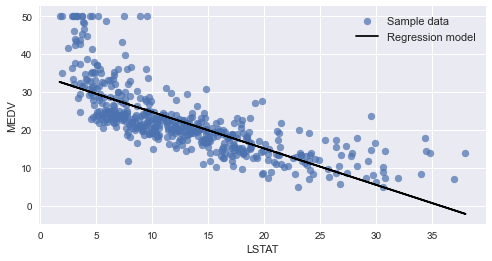

In [149]:
# The function for visualisation
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.scatter(X, y_true, alpha=0.7, label='Sample data')
  ax.plot(X, y_predict, color='black', label='Regression model')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend(facecolor='white', fontsize=11)

# Predict MEDV
y_predict = sgd_lr_lstat.predict(X)  

# Create plot
plot_regression_2d(X, y, y_predict)

In [150]:
# Calculate the R**2 score
print(f'R2 score: {round(metrics.r2_score(y, y_predict),3)}')

R2 score: 0.542


### Train model by the Gradient descent on all features

In [151]:
# Create the list of factors
features = boston_data.drop('MEDV', axis=1).columns

# Create the observation matrix X and vector of the answers y
X = boston_data[features]
y = boston_data['MEDV']

# Create the object class of the linear regression with SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

# Train the model. Find parameters with SGD method
sgd_lr_full.fit(X, y)

# Create the DataFrame 'Features' and 'Coefficients'
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


The algorithm did not reach the minimum for some reason. The model is unstable.

In [153]:
# Let's make the predict
y_predict = sgd_lr_full.predict(X)

# Calculate the R2 score
print(f'R2 score: {round(metrics.r2_score(y, y_predict),3)}')

R2 score: -1.059030386212998e+25


In [154]:
# Let's standardize
from sklearn import preprocessing

# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Standardization
X_scaled = scaler.fit_transform(X)

# Make DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


Try again

In [155]:
# Create the object class of the linear regression with SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

# Train the model. Find parameters with SGD method
sgd_lr_full.fit(X_scaled, y)

# Create the DataFrame 'Features' and 'Coefficients'
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [156]:
# Let's make the predict
y_predict = sgd_lr_full.predict(X_scaled)

# Calculate the R2 score
print(f'R2 score: {round(metrics.r2_score(y, y_predict),3)}')

R2 score: 0.74


Tune 'learning_rate' and 'eta0'

In [157]:
# Create the object class of the linear regression with SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant',
    eta0=0.1,
    random_state=42
)

# Train model
sgd_lr_bad.fit(X_scaled, y)

# Predict MEDV
y_predict = sgd_lr_bad.predict(X_scaled)

# Calculate R2 score
print(f'R2 score: {round(metrics.r2_score(y, y_predict))}')

R2 score: -335415038360


In [158]:
# Create the object class of the linear regression with SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant',
    eta0=1e-6,
    random_state=42
)

# Train model
sgd_lr_bad.fit(X_scaled, y)

# Predict MEDV
y_predict = sgd_lr_bad.predict(X_scaled)

# Calculate R2 score
print(f'R2 score: {round(metrics.r2_score(y, y_predict))}')

R2 score: -2


c:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
